In [1]:
# library importation
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# loading dataset
data = pd.read_csv('tedsd_puf_2019.csv')
data.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [3]:
data.tail()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
1722498,2019,20191743528,56,-9,4,2,7,-9,33,1,...,0,0,0,0,0,0,8,4,0,1
1722499,2019,20191666713,56,-9,3,3,7,1,13,7,...,0,0,0,0,0,0,8,4,0,2
1722500,2019,20191405666,56,-9,2,1,6,-9,33,1,...,0,0,0,0,0,0,8,4,0,2
1722501,2019,20191697509,56,-9,1,1,7,3,14,7,...,0,0,0,0,0,0,8,4,0,3
1722502,2019,20191502624,56,-9,-9,4,7,-9,13,1,...,0,0,0,0,0,0,8,4,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722503 entries, 0 to 1722502
Data columns (total 76 columns):
 #   Column                 Dtype
---  ------                 -----
 0   DISYR                  int64
 1   CASEID                 int64
 2   STFIPS                 int64
 3   CBSA2010               int64
 4   EDUC                   int64
 5   MARSTAT                int64
 6   SERVICES               int64
 7   DETCRIM                int64
 8   LOS                    int64
 9   PSOURCE                int64
 10  NOPRIOR                int64
 11  ARRESTS                int64
 12  EMPLOY                 int64
 13  METHUSE                int64
 14  PSYPROB                int64
 15  PREG                   int64
 16  GENDER                 int64
 17  VET                    int64
 18  LIVARAG                int64
 19  DAYWAIT                int64
 20  SERVICES_D             int64
 21  REASON                 int64
 22  EMPLOY_D               int64
 23  LIVARAG_D              int64
 24

In [5]:
data.columns

Index(['DISYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D',
       'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE',
       'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2',
       'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3',
       'FREQ1', 'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [6]:
# the Y variable..  ===> 'PSYPROB'
# The dependent variable in this study was co-occurring mental health and substance use disorder which is coded as PSYPROB (1 = Yes, 2 = No)

# comment--- detection noisy content ... 
# for proper checking let us look into the X various uniques value.. 
data.PSYPROB.unique()

array([ 1,  2, -9], dtype=int64)

In [7]:
binary_col_list = []
for col in data.columns: 
    # print column with thier unique value....
    print(f"Column :{col} ===========>  Unique Value: {data[col].unique()}")
    # collecting binary value content
    if len(data[col].unique()) <= 2: 
        binary_col_list.append(col)

Column :DISYR ===========>  Unique Value: [2019]
Column :CASEID ===========>  Unique Value: [20191553576 20191465214 20191443889 ... 20191405666 20191697509
 20191502624]
Column :STFIPS ===========>  Unique Value: [ 2 37 36  6  8 18  9 44 27 26 49 32 17 24 10 39 34 21 45 16 50  1 42 46
 25 22 20  5 51 30 48 19 29 56 35 13 15 12  4 33 23 11 40 28 47 72 55 31
 38]
Column :CBSA2010 ===========>  Unique Value: [   -9 48900 11260 40380 42200 19740 41740 14860 46700 39300 19820 35620
 39340 19500 17020 40140 23420 31080 41860 10580 21700 42220 30460 24860
 35300 25540 37980 39580 29820 15540 27780 17820 22420 12940 37100 41620
 35980 33460 14500 14460 13980 44140 36260 15380 17460 43580 40220 27900
 49340 47900 12100 29620 42100 42140 47300 16980 12060 46520 39820 14260
 33700 41940 28020 27980 25900 34740 34820 40060 40980 20100 12700 31700
 40900 44700 20260 45060 38860 12540 24300 19340 27340 39900 41060 48540
 24020 40420 27140 41180 39660 20500 46180 14540 16860 28940 34980 19100
 34100

In [8]:
# print(binary_col_list.append('PSYPROB'))

In [9]:
data[binary_col_list].corr()

,DISYR,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG
DISYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALCFLG,NaN,1.000000,-0.004363,-0.016005,-0.295478,-0.039187,-0.164973,-0.006194,-0.010459,-0.179398,-0.035026,-0.016120,-0.073525,-0.005858,-0.011962,-0.019886,-0.000185,-0.002199,-0.015850
COKEFLG,NaN,-0.004363,1.000000,-0.016917,0.144198,-0.006556,-0.049601,0.006930,0.001554,-0.160045,-0.016899,0.000159,-0.003981,-0.004681,-0.009689,-0.008230,-0.008123,-0.010695,-0.030605
MARFLG,NaN,-0.016005,-0.016917,1.000000,-0.164419,-0.021356,-0.049244,0.013861,0.039777,0.041485,0.013371,-0.004125,-0.033098,-0.001589,-0.010179,-0.003768,0.002397,0.009474,-0.002579
HERFLG,NaN,-0.295478,0.144198,-0.164419,1.000000,0.009486,-0.048681,-0.024029,-0.025100,-0.035976,-0.031629,-0.001855,0.088812,-0.002627,-0.008512,-0.008013,-0.014474,-0.014500,-0.027389
METHFLG,NaN,-0.039187,-0.006556,-0.021356,0.009486,1.000000,0.019195,-0.003758,-0.003941,-0.014634,-0.000335,0.001268,0.015986,-0.000729,0.000649,0.001927,-0.001471,0.000268,0.000269
OPSYNFLG,NaN,-0.164973,-0.049601,-0.049244,-0.048681,0.019195,1.000000,-0.018927,-0.010491,-0.016863,0.017201,0.002850,0.076708,0.005575,0.002336,0.023929,-0.004616,0.004209,-0.017345
PCPFLG,NaN,-0.006194,0.006930,0.013861,-0.024029,-0.003758,-0.018927,1.000000,0.007904,-0.026954,-0.002659,-0.002483,-0.011025,-0.001260,-0.001818,-0.002522,-0.000345,-0.000634,-0.007438
HALLFLG,NaN,-0.010459,0.001554,0.039777,-0.025100,-0.003941,-0.010491,0.007904,1.000000,-0.006265,0.006683,0.003497,-0.000809,0.002852,-0.000603,0.004131,0.004547,0.006484,-0.003000
MTHAMFLG,NaN,-0.179398,-0.160045,0.041485,-0.035976,-0.014634,-0.016863,-0.026954,-0.006265,1.000000,-0.035121,-0.015601,-0.039302,-0.002105,-0.008872,-0.010237,-0.000107,-0.003849,0.002764


In [10]:
data.DISYR

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1722498    2019
1722499    2019
1722500    2019
1722501    2019
1722502    2019
Name: DISYR, Length: 1722503, dtype: int64

In [11]:
# checking value count

Text(0, 0.5, 'Value Count')

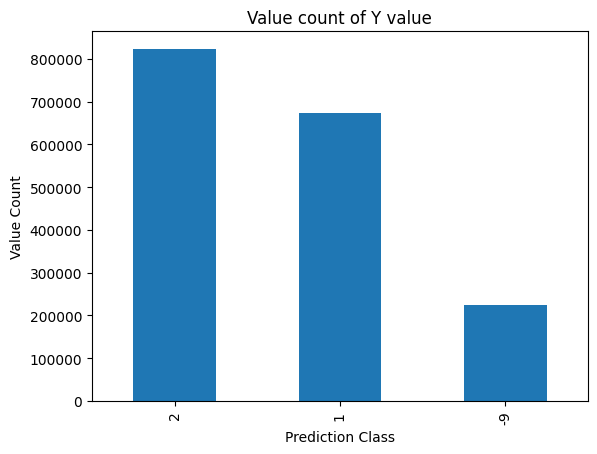

In [12]:
data.PSYPROB.value_counts().plot(kind='bar')
plt.title('Value count of Y value')
plt.xlabel('Prediction Class')
plt.ylabel('Value Count')

In [13]:
# observations
# 1. the dataset containg too much colums that are irrelivant for prediction 
# 2. almost all the column sample contain incosistence data value
# 3. 

In [14]:
# cleaning data

In [15]:
data.DISYR

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1722498    2019
1722499    2019
1722500    2019
1722501    2019
1722502    2019
Name: DISYR, Length: 1722503, dtype: int64

In [16]:
# drop completely unused data
data.drop(columns=['DISYR'], inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data

,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,20191553576,2,-9,4,1,7,-9,37,1,0,...,0,0,0,0,0,0,9,4,0,1
1,20191465214,2,-9,3,1,7,-9,35,1,0,...,0,0,0,0,0,0,9,4,0,3
2,20191443889,2,-9,2,1,7,-9,35,1,0,...,0,0,0,0,0,0,9,4,0,3
3,20191409377,2,-9,3,1,7,-9,37,1,1,...,0,0,0,0,0,0,9,4,0,3
4,20191479567,2,-9,3,3,7,-9,37,1,1,...,0,0,0,0,0,0,9,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722498,20191743528,56,-9,4,2,7,-9,33,1,0,...,0,0,0,0,0,0,8,4,0,1
1722499,20191666713,56,-9,3,3,7,1,13,7,0,...,0,0,0,0,0,0,8,4,0,2
1722500,20191405666,56,-9,2,1,6,-9,33,1,0,...,0,0,0,0,0,0,8,4,0,2
1722501,20191697509,56,-9,1,1,7,3,14,7,0,...,0,0,0,0,0,0,8,4,0,3


In [19]:
# droping colum of -9 from the Y columns
data1 = data[data['PSYPROB'] != -9]

In [20]:
data1.PSYPROB.unique()

array([1, 2], dtype=int64)

In [21]:
binary_col_list = []
for col in data1.columns: 
    # print column with thier unique value....
    if len(data1[col].unique()) < 6:
        print(f"Column :{col} ===========>  Unique Value: {data1[col].value_counts()}")

Column :MARSTAT ===========>  Unique Value:  1    832404
-9    245971
 4    190803
 2    156302
 3     71648
Name: MARSTAT, dtype: int64
Column :NOPRIOR ===========>  Unique Value:  1    847090
 0    596879
-9     53159
Name: NOPRIOR, dtype: int64
Column :ARRESTS ===========>  Unique Value:  0    1284503
-9     106710
 1      89794
 2      16121
Name: ARRESTS, dtype: int64
Column :EMPLOY ===========>  Unique Value:  3    550406
 4    463258
 1    238738
-9    146495
 2     98231
Name: EMPLOY, dtype: int64
Column :METHUSE ===========>  Unique Value:  2    1119371
 1     202387
-9     175370
Name: METHUSE, dtype: int64
Column :PSYPROB ===========>  Unique Value: 2    823223
1    673905
Name: PSYPROB, dtype: int64
Column :PREG ===========>  Unique Value: -9    966901
 2    514646
 1     15581
Name: PREG, dtype: int64
Column :GENDER ===========>  Unique Value:  1    953940
 2    542463
-9       725
Name: GENDER, dtype: int64
Column :VET ===========>  Unique Value:  2    1327192
-9     1327

In [22]:
import numpy as np 
data1.replace(-9, np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7184\4182743144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace(-9, np.nan, inplace=True)


In [23]:
import statistics

In [24]:
# data1.head(30000)

In [25]:
data2 = data1.head(30000)

In [26]:
data2.head()

,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,20191553576,2,NaN,4.0,1.0,7,NaN,37,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,1
1,20191465214,2,NaN,3.0,1.0,7,NaN,35,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,3
2,20191443889,2,NaN,2.0,1.0,7,NaN,35,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,3
3,20191409377,2,NaN,3.0,1.0,7,NaN,37,1.0,1.0,...,0,0,0,0,0,0,9,4,0.0,3
4,20191479567,2,NaN,3.0,3.0,7,NaN,37,1.0,1.0,...,0,0,0,0,0,0,9,4,0.0,1


In [27]:
# replacing the none value with thier mode entry in the column
for col in data2.columns: 
    mode = statistics.mode(data2[col].values.tolist())
    data2[col].replace(np.nan, mode, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7184\2542734167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col].replace(np.nan, mode, inplace=True)


In [28]:
data2.head()

,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,20191553576,2,11260.0,4.0,1.0,7,2.0,37,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,1
1,20191465214,2,11260.0,3.0,1.0,7,2.0,35,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,3
2,20191443889,2,11260.0,2.0,1.0,7,2.0,35,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,3
3,20191409377,2,11260.0,3.0,1.0,7,2.0,37,1.0,1.0,...,0,0,0,0,0,0,9,4,0.0,3
4,20191479567,2,11260.0,3.0,3.0,7,2.0,37,1.0,1.0,...,0,0,0,0,0,0,9,4,0.0,1


In [29]:
print(len(data2.columns))

75


In [30]:
data2.shape

(30000, 75)

In [31]:
# reducing the data dimensiton
# splitting into X and y

In [32]:
X = data2.drop(columns=['PSYPROB'])
y = data2.PSYPROB

In [33]:
# Reducing dimentions
X

,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,20191553576,2,11260.0,4.0,1.0,7,2.0,37,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,1
1,20191465214,2,11260.0,3.0,1.0,7,2.0,35,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,3
2,20191443889,2,11260.0,2.0,1.0,7,2.0,35,1.0,0.0,...,0,0,0,0,0,0,9,4,0.0,3
3,20191409377,2,11260.0,3.0,1.0,7,2.0,37,1.0,1.0,...,0,0,0,0,0,0,9,4,0.0,3
4,20191479567,2,11260.0,3.0,3.0,7,2.0,37,1.0,1.0,...,0,0,0,0,0,0,9,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41044,20191608753,4,11260.0,3.0,1.0,7,2.0,36,1.0,0.0,...,0,0,0,0,0,0,8,4,0.0,2
41045,20191690054,4,11260.0,3.0,1.0,7,2.0,10,3.0,1.0,...,0,0,0,0,0,0,8,4,0.0,2
41046,20191757356,4,11260.0,3.0,1.0,7,2.0,17,3.0,1.0,...,0,0,0,0,0,0,8,4,0.0,2
41047,20191444573,4,11260.0,3.0,1.0,7,2.0,23,1.0,1.0,...,0,0,0,0,0,0,8,4,0.0,0


In [34]:
# dimentionality reduction using PCA

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X)

In [37]:
data_scaled

array([[0.77217269, 0.01408451, 0.01754386, ..., 1.        , 0.        ,
        0.33333333],
       [0.67496851, 0.01408451, 0.01754386, ..., 1.        , 0.        ,
        1.        ],
       [0.65150957, 0.01408451, 0.01754386, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.99634448, 0.04225352, 0.01754386, ..., 1.        , 0.        ,
        0.66666667],
       [0.65226201, 0.04225352, 0.01754386, ..., 1.        , 0.        ,
        0.        ],
       [0.69772891, 0.04225352, 0.01754386, ..., 1.        , 0.        ,
        0.        ]])

In [38]:
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(data_scaled)

In [39]:
print("Original Data Shape:", data.shape)
print("Reduced Data Shape:", data_reduced.shape)
print("Reduced Data:", data_reduced)

Original Data Shape: (1722503, 75)
Reduced Data Shape: (30000, 10)
Reduced Data: [[-0.83914748 -0.31842195  0.20828438 ...  0.44543316  0.02300836
  -0.08566852]
 [-0.32721208 -0.75486174  0.51935653 ...  0.10271362 -0.20790085
   0.07940066]
 [-0.20618051 -0.37521844  0.35697274 ...  0.52564231  0.01169331
   0.19399662]
 ...
 [-0.23767032  0.37545028 -0.53757574 ... -0.13460435 -0.14845034
  -0.70144137]
 [-1.08368486  0.43539684 -0.01241578 ... -0.41189015  0.12615578
  -0.00661287]
 [-1.20121907  0.35513412 -0.06206226 ... -0.09947092 -0.34457708
  -0.08624846]]


In [40]:
reduced_df = pd.DataFrame(data_reduced, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Reduced DataFrame:")
reduced_df

Reduced DataFrame:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.839147,-0.318422,0.208284,0.191866,0.407219,0.674812,0.619626,0.445433,0.023008,-0.085669
1,-0.327212,-0.754862,0.519357,0.359300,0.448610,0.335842,1.218958,0.102714,-0.207901,0.079401
2,-0.206181,-0.375218,0.356973,0.079892,-0.973249,-0.006444,0.990081,0.525642,0.011693,0.193997
3,0.054161,-0.472481,0.171022,1.213190,-0.709676,0.261237,0.120053,0.212483,-0.329738,0.593989
4,-0.617128,-0.092990,0.124730,0.661650,-0.815139,0.837166,-0.411336,0.358646,0.352861,0.191042
...,...,...,...,...,...,...,...,...,...,...
29995,-0.559538,0.076796,-0.828683,0.015356,-0.342171,0.524181,0.164648,0.394683,-0.179506,0.596979
29996,-0.244515,0.405407,-0.517166,0.363906,-0.291317,-0.474392,-0.628992,-0.193234,-0.223332,-0.728437
29997,-0.237670,0.375450,-0.537576,0.413915,-0.304075,-0.485096,-0.618389,-0.134604,-0.148450,-0.701441
29998,-1.083685,0.435397,-0.012416,0.318054,0.310793,-0.462280,-0.311813,-0.411890,0.126156,-0.006613


In [41]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
param_grids = {
    'RF': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        # 'min_samples_split': [2, 5, 10],
        # 'min_samples_leaf': [1, 2, 4]
    },
    'GB': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'DNN': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SGD': {
        'loss': ['hinge', 'log', 'modified_huber'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'optimal', 'invscaling']
    }
}

models = {
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'DNN': MLPClassifier(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier()
}

# Step 3: Perform Randomized Search
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grids[name],
        n_iter=20,  # Number of parameter settings sampled
        scoring='accuracy',
        cv=3,
        random_state=42,
        verbose=1,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    best_models[name] = search.best_estimator_
    print(f"Best parameters for {name}: {search.best_params_}\n")

# Step 4: Evaluate Best Models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {acc:.4f}")

Training RF...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for RF: {'n_estimators': 200, 'max_depth': 20}

Training GB...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for GB: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}

Training DNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for DNN: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}

Training KNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'minkowski'}

Training SGD...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
42 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn

Best parameters for SGD: {'penalty': 'l1', 'loss': 'hinge', 'learning_rate': 'optimal', 'alpha': 0.0001}

Accuracy for RF: 0.7755
Accuracy for GB: 0.7698
Accuracy for DNN: 0.6890
Accuracy for KNN: 0.6512
Accuracy for SGD: 0.3110


In [44]:
dataset = data1

In [ ]:
# training with individual with best parameter.... 
dataset

In [ ]:
# replacing the none value with thier mode entry in the column
for col in dataset.columns: 
    mode = statistics.mode(dataset[col].values.tolist())
    dataset[col].replace(np.nan, mode, inplace=True)